# Analisis Performa Penjualan Multi-Channel

## Pendahuluan

Sumber dataset yang digunakan berasal dari Kaggle dengan judul "Superstore Dataset" ([Link dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)).

**Fitur-Fitur**

| Fitur | Deskripsi |  
|---|---|  
| Row ID | Unique ID for each row. |
| Order ID | Unique Order ID for each Customer. |
| Order Date | Order Date of the product. |
| Ship Date | Shipping Date of the Product. |
| Ship Mode| Shipping Mode specified by the Customer. |
| Customer ID | Unique ID to identify each Customer. |
| Customer Name | Name of the Customer. |
| Segment | The segment where the Customer belongs. |
| Country | Country of residence of the Customer. |
| City | City of residence of of the Customer. |
| State | State of residence of the Customer. |
| Postal Code | Postal Code of every Customer. |
| Region | Region where the Customer belong. |
| Product ID | Unique ID of the Product. |
| Category | Category of the product ordered. |
| Sub-Category | Sub-Category of the product ordered. |
| Product Name | Name of the Product |
| Sales | Sales of the Product. |
| Quantity | Quantity of the Product. |
| Discount | Discount provided. |
| Profit | Profit/Loss incurred. |

## Identifikasi dan Ekstrasi Data

### 1. Import libraries

Import library dasar yang diperlukan untuk proses analisis data.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load data

Load data `Sample - Superstore.csv`

In [2]:
# load data
df = pd.read_csv('Data/Superstore.csv', encoding="latin1")

### 3. Data examination

Tampilkan 5 baris pertama untuk melihat gambaran data.

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Melihat tipe data yang dimiliki untuk tiap-tiap kolom.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Melihat ukuran dataset

In [5]:
df.shape

(9994, 21)

Dataset terdiri dari 9994 baris dan 21 kolom.

### 4. Check duplicate rows

In [6]:
df.duplicated().sum()

0

In [7]:
df.duplicated(subset=["Order ID","Product ID","Order Date","Ship Date"]).sum()

8

In [8]:
df[df.duplicated(subset=["Order ID","Product ID","Order Date"],keep=False)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
350,351,CA-2016-129714,9/1/2016,9/3/2016,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,24.560,2,0.0,11.5432
352,353,CA-2016-129714,9/1/2016,9/3/2016,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,10009,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,49.120,4,0.0,23.0864
430,431,US-2016-123750,4/15/2016,4/21/2016,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,...,28052,South,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,408.744,7,0.2,76.6395
431,432,US-2016-123750,4/15/2016,4/21/2016,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,...,28052,South,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,291.960,5,0.2,54.7425
1300,1301,CA-2016-137043,12/23/2016,12/25/2016,Second Class,LC-17140,Logan Currie,Consumer,United States,Springfield,...,22153,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",572.760,6,0.0,166.1004
1301,1302,CA-2016-137043,12/23/2016,12/25/2016,Second Class,LC-17140,Logan Currie,Consumer,United States,Springfield,...,22153,South,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",286.380,3,0.0,83.0502
3183,3184,CA-2017-152912,11/9/2017,11/12/2017,Second Class,BM-11650,Brian Moss,Corporate,United States,Columbia,...,21044,East,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,1633.140,9,0.0,473.6106
3184,3185,CA-2017-152912,11/9/2017,11/12/2017,Second Class,BM-11650,Brian Moss,Corporate,United States,Columbia,...,21044,East,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,544.380,3,0.0,157.8702
3405,3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,...,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,3407,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,...,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


Terdapat 8 transaksi yang memiliki `Product ID` lebih dari satu dalam satu `Order ID`, namun dengan `Quantity` yang berbeda. Oleh karena itu, transaksi tersebut akan dihapus.


### 5. Summary statistics

Melihat rangkuman statistika untuk tiap dataset dengan tujuan mempermudah dalam memahami data serta persebaran data

In [9]:
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


### 6. Identify missing values

In [10]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Tidak ada missing values pada dataset ini.

## Transformasi Data dan Pembersihan Data

### 1. Remove duplicate values

In [11]:
print("Sebelum duplikat dihapus: ", df.duplicated(subset=["Order ID","Product ID","Order Date","Ship Date"]).sum())
df = df.drop_duplicates(subset=["Order ID","Product ID","Order Date"],keep=False)
print("Setelah duplikat dihapus: ", df.duplicated(subset=["Order ID","Product ID","Order Date","Ship Date"]).sum())

Sebelum duplikat dihapus:  8
Setelah duplikat dihapus:  0


### 2. Ubah tipe data kolom date dari object ke datetime

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9978 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9978 non-null   int64  
 1   Order ID       9978 non-null   object 
 2   Order Date     9978 non-null   object 
 3   Ship Date      9978 non-null   object 
 4   Ship Mode      9978 non-null   object 
 5   Customer ID    9978 non-null   object 
 6   Customer Name  9978 non-null   object 
 7   Segment        9978 non-null   object 
 8   Country        9978 non-null   object 
 9   City           9978 non-null   object 
 10  State          9978 non-null   object 
 11  Postal Code    9978 non-null   int64  
 12  Region         9978 non-null   object 
 13  Product ID     9978 non-null   object 
 14  Category       9978 non-null   object 
 15  Sub-Category   9978 non-null   object 
 16  Product Name   9978 non-null   object 
 17  Sales          9978 non-null   float64
 18  Quantity     

In [13]:
df["Order Date"] = pd.to_datetime(df.loc[:,"Order Date"])
df["Ship Date"] = pd.to_datetime(df.loc[:,"Ship Date"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9978 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9978 non-null   int64         
 1   Order ID       9978 non-null   object        
 2   Order Date     9978 non-null   datetime64[ns]
 3   Ship Date      9978 non-null   datetime64[ns]
 4   Ship Mode      9978 non-null   object        
 5   Customer ID    9978 non-null   object        
 6   Customer Name  9978 non-null   object        
 7   Segment        9978 non-null   object        
 8   Country        9978 non-null   object        
 9   City           9978 non-null   object        
 10  State          9978 non-null   object        
 11  Postal Code    9978 non-null   int64         
 12  Region         9978 non-null   object        
 13  Product ID     9978 non-null   object        
 14  Category       9978 non-null   object        
 15  Sub-Category   9978 non-nu

### 3. Hilangkan kolom yang tidak diperlukan

In [15]:
df.drop(columns=["Row ID"], inplace=True)

In [16]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Exploratory Data Analysis

### 1. Univariate Analysis

#### Order

In [17]:
# Jumlah transaksi
df["Order ID"].nunique()

5007

Terdapat 5007 transaksi.

#### Region and State

In [18]:
# Cek unique value dari country
df["Country"].unique()

array(['United States'], dtype=object)

Hanya terdapat satu negara yaitu United States.

In [19]:
df["State"].value_counts()

State
California              2001
New York                1126
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     467
Florida                  383
Michigan                 255
North Carolina           247
Arizona                  224
Virginia                 222
Georgia                  184
Tennessee                183
Colorado                 180
Indiana                  149
Kentucky                 137
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 103
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               51
Louisiana                 42
South Carolina            42
Nevada  

In [20]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [21]:
import plotly.graph_objects as go

# Create new column with State Abbreviations
df['State_abb'] = df['State'].replace(us_state_to_abbrev)

# Plot
fig = go.Figure(data=go.Choropleth(
    locations= df['State_abb'].value_counts().index,
    z = df['State_abb'].value_counts(),
    locationmode = 'USA-states',
    colorscale = 'teal', zmin = 1, zmax = 1000
))

fig.update_layout(
    font = dict(
            size = 14
            ),
    title={
        'text': "Number of Customers by State Map",
        'y':0.95,
        'x':0.5
        },
    geo_scope='usa',
)

fig.show()

#### Ship Mode

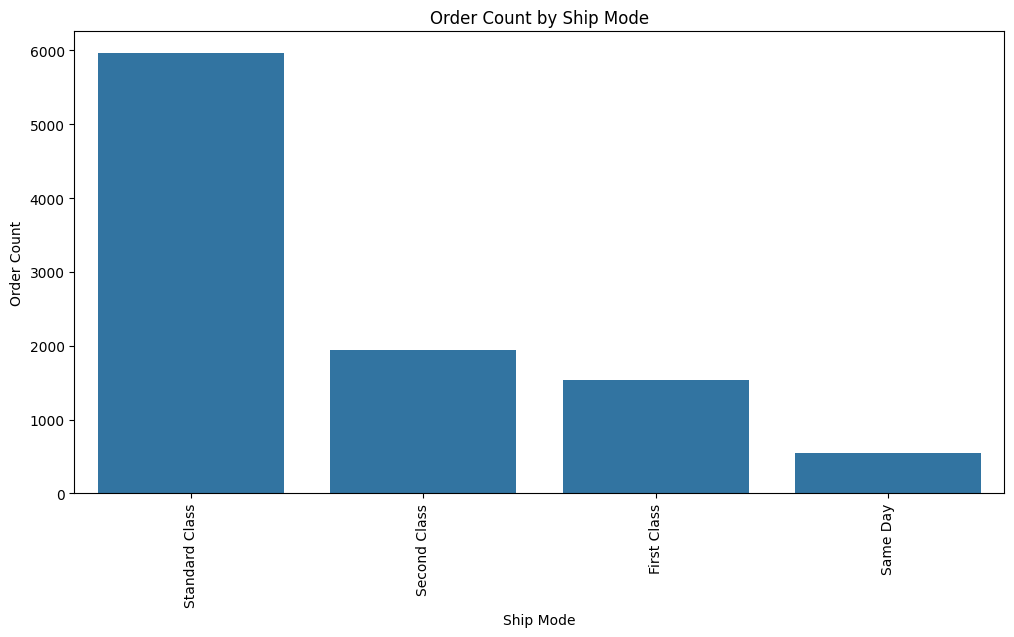

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Ship Mode', order=df['Ship Mode'].value_counts().index)
plt.title('Order Count by Ship Mode')
plt.xticks(rotation=90)
plt.xlabel('Ship Mode')
plt.ylabel('Order Count')
plt.show()

#### Customer

In [23]:
df['Customer ID'].nunique()

793

Terdapat 793 Customer yang melakukan transaksi.

#### Customer Segment

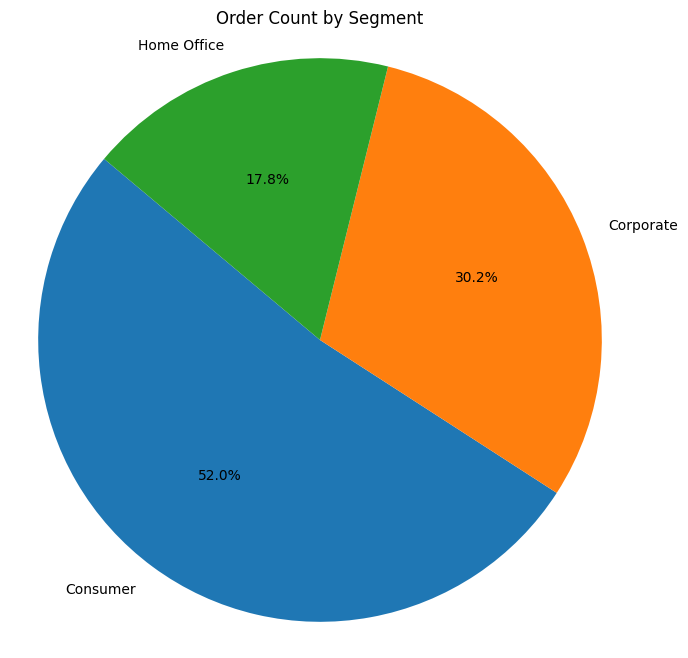

In [24]:
# Count the number of orders per segment
segment_counts = df['Segment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Order Count by Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#### Product

In [25]:
# Cek jumlah unique value dari Product ID
df["Product ID"].nunique()

1862

Terdapat 1862 produk yang berbeda.

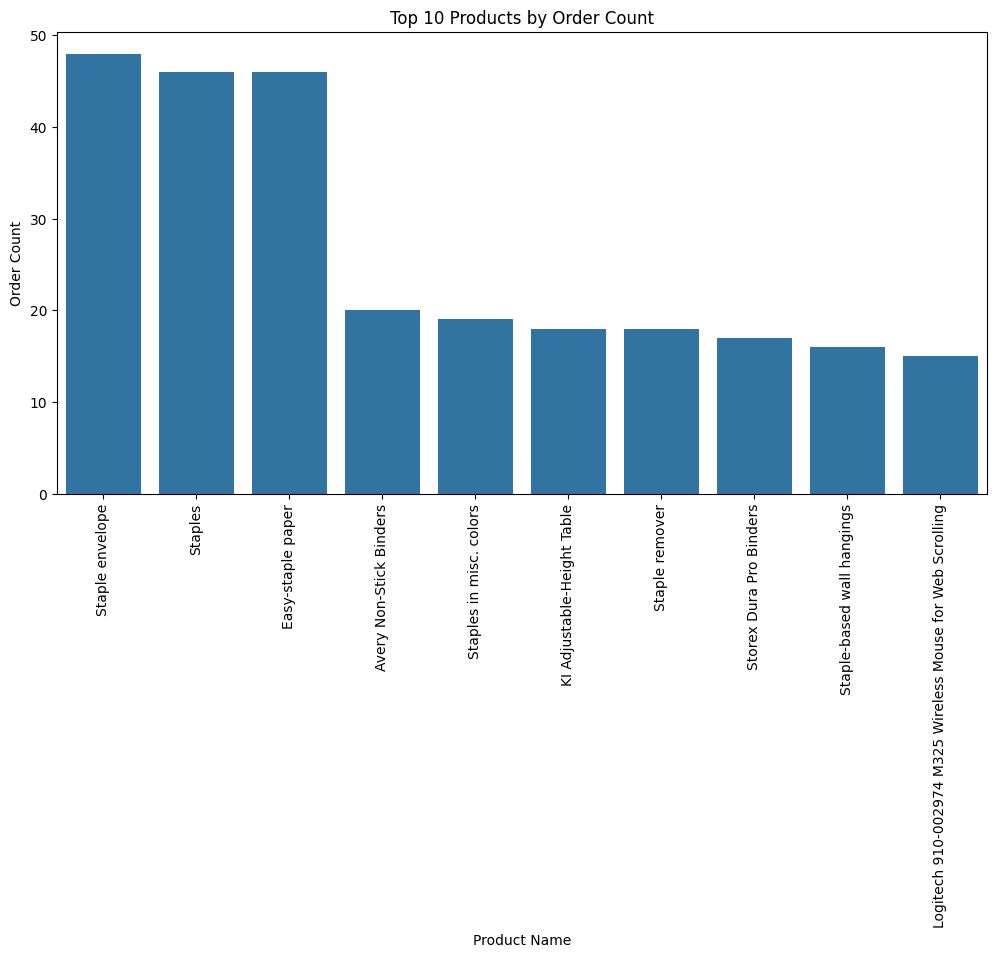

In [26]:
# Plot top 10 products
top_10_products = df['Product Name'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.index, y=top_10_products.values)
plt.title('Top 10 Products by Order Count')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Order Count')
plt.show()

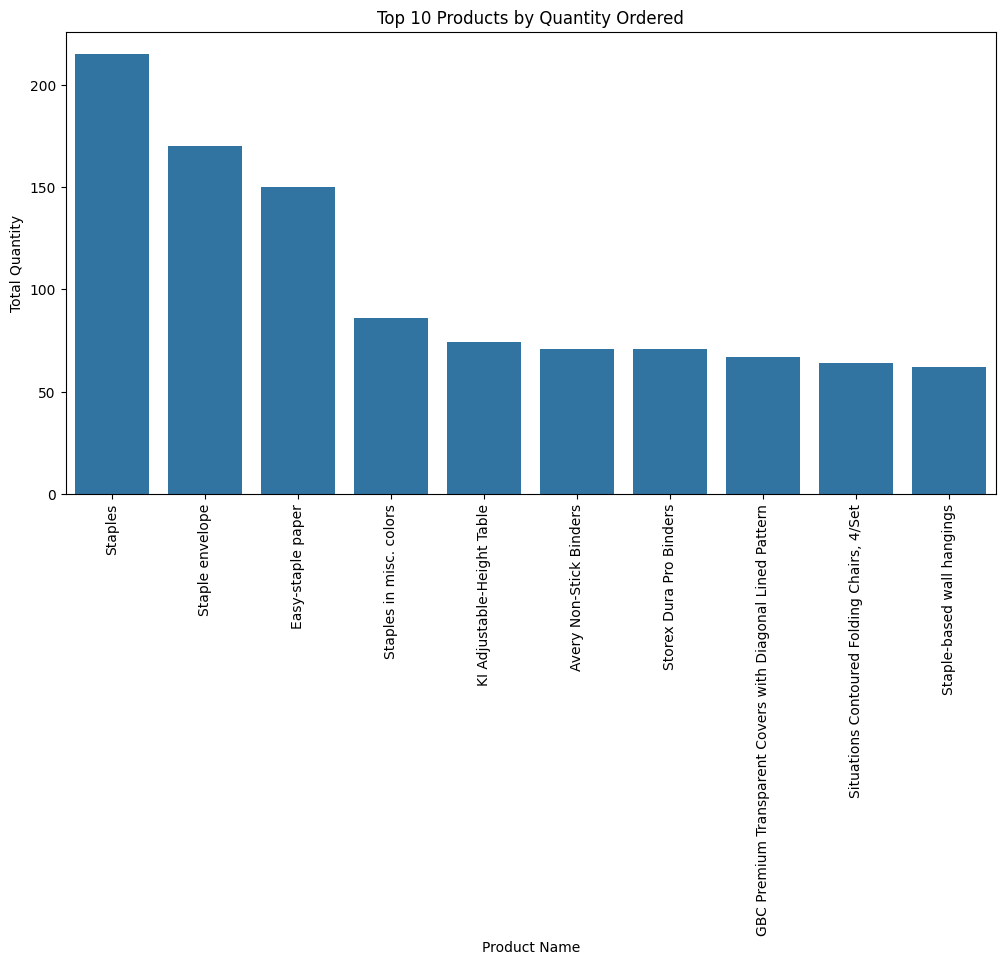

In [27]:
top_10_by_quantity = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_by_quantity.index, y=top_10_by_quantity.values)
plt.title('Top 10 Products by Quantity Ordered')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.show()

#### Product Category

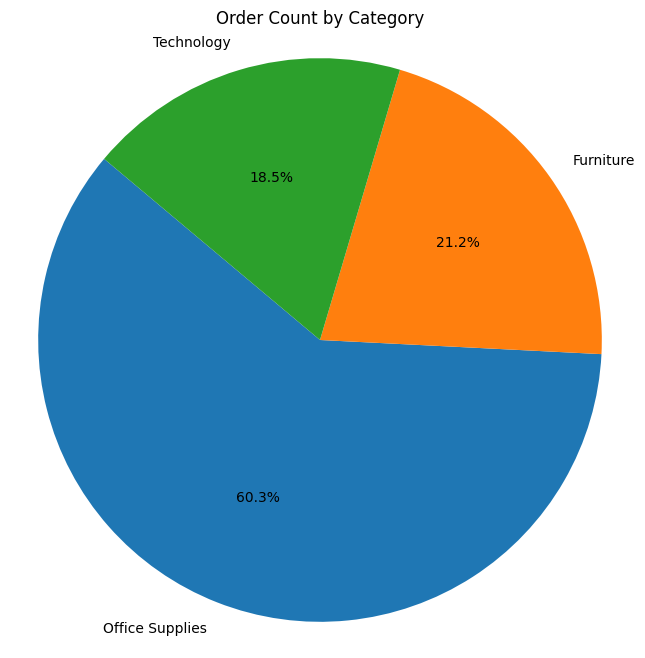

In [28]:
# Count the number of orders per category
category_counts = df['Category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Order Count by Category')
plt.axis('equal')  # Makes sure the pie chart is a circle
plt.show()

#### Sub-Category

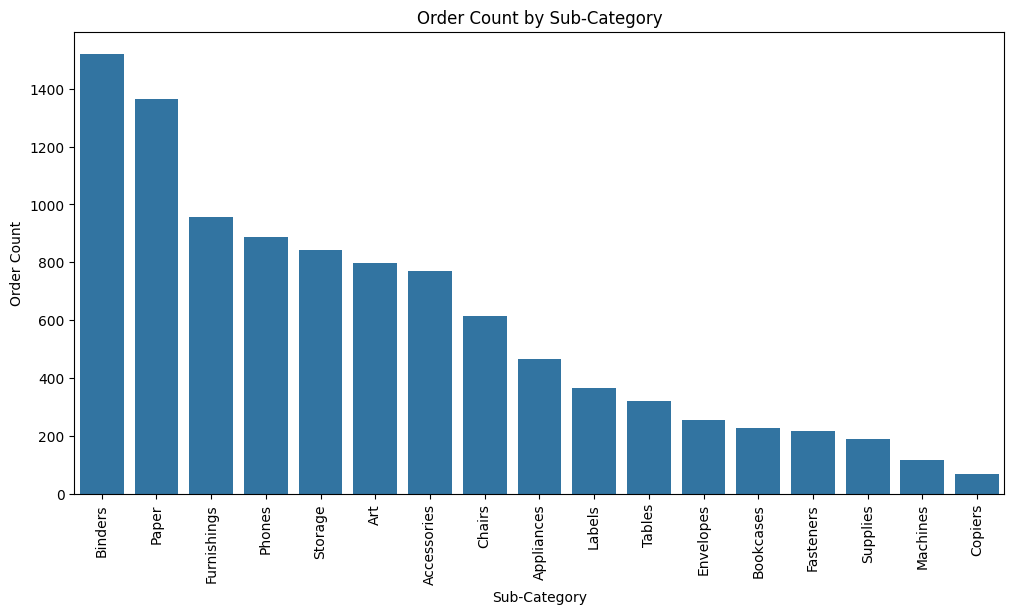

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sub-Category', order=df['Sub-Category'].value_counts().index)
plt.title('Order Count by Sub-Category')
plt.xticks(rotation=90)
plt.xlabel('Sub-Category')
plt.ylabel('Order Count')
plt.show()

### 2. Bivariate Analysis

#### Korelasi

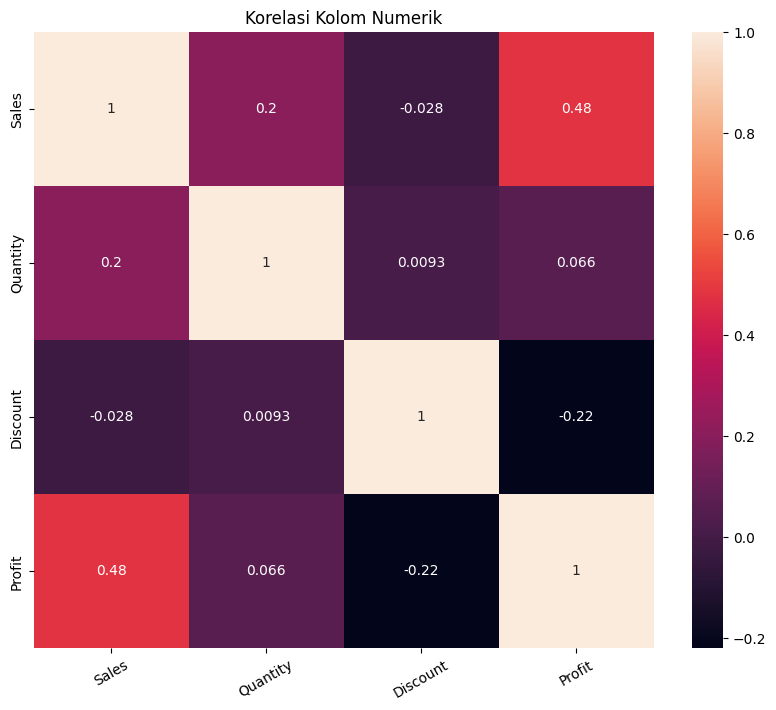

In [30]:
# 1. korelasi kolom numerik
numeric_df = df.select_dtypes(include=['int32', 'int64', 'float64'])
# Remove 'Postal Code' column if it exists
if 'Postal Code' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['Postal Code'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Korelasi Kolom Numerik')
plt.xticks(rotation=30)
plt.show()

Sales memiliki korelasi positif terhadap Profit, yaitu sebesar 0.48. Sementara itu, Discount memiliki korelasi negatif terhadap Profit, yaitu sebesar -0.22. Hal ini menunjukkan bahwa semakin besar diskon yang diberikan, maka profit yang didapatkan akan semakin kecil.

#### Sales vs Profit

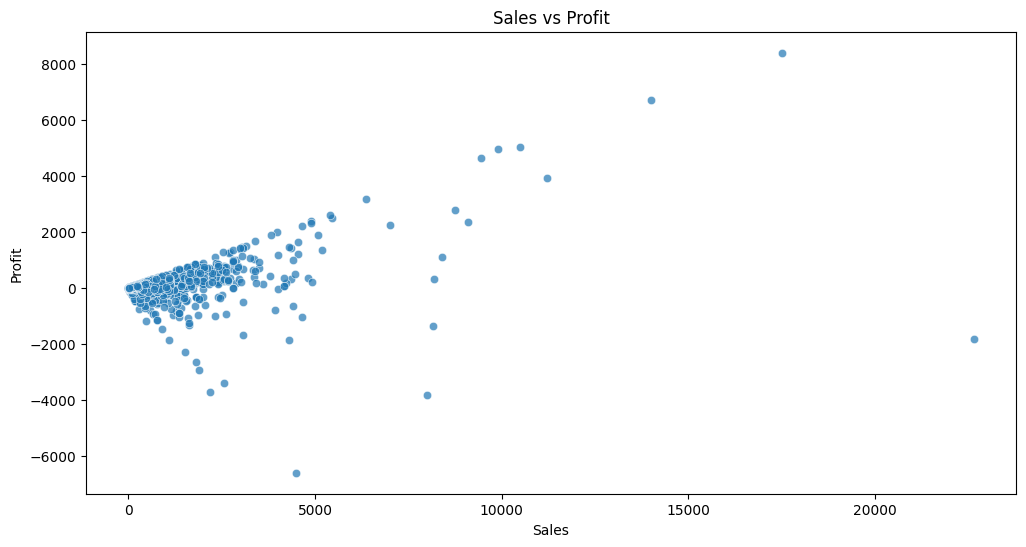

In [31]:
# Sales vs Profit
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', alpha=0.7)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

#### Total Profit vs Category

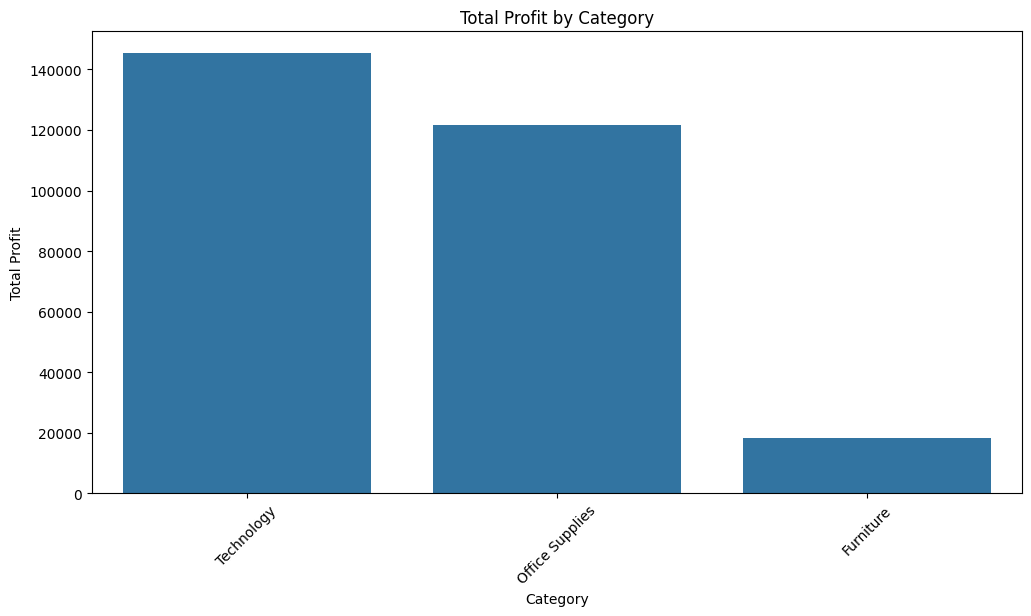

In [32]:
# Aggregate total profit by sub-category
profit_summary = df.groupby('Category')['Profit'].sum().reset_index()

# Sort by total profit (descending)
profit_summary = profit_summary.sort_values(by='Profit', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=profit_summary, x='Category', y='Profit')
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

#### Total Profit vs Sub-Category

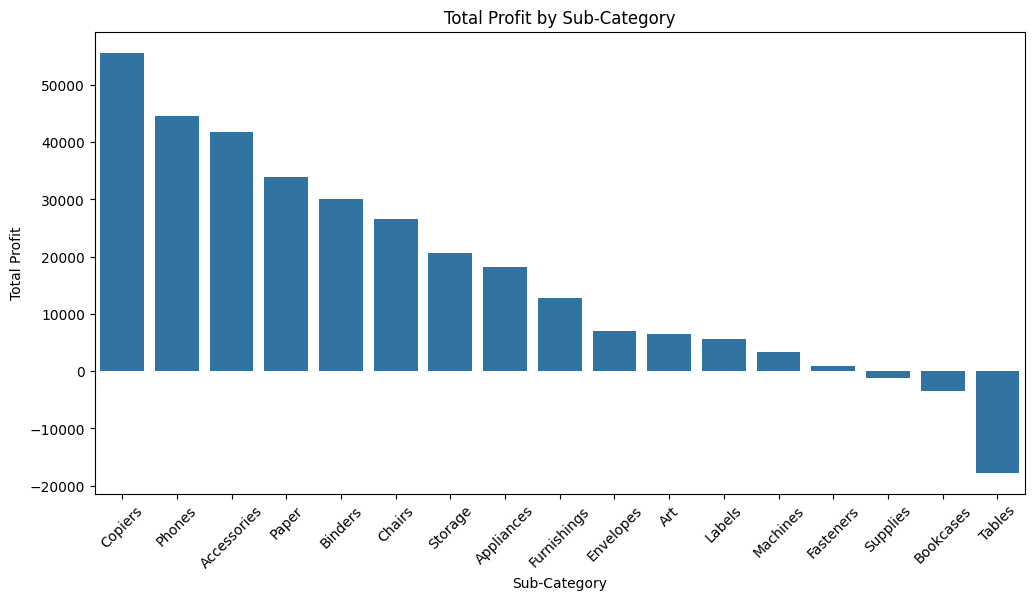

In [33]:
# Aggregate total profit by sub-category
profit_summary = df.groupby('Sub-Category')['Profit'].sum().reset_index()

# Sort by total profit (descending)
profit_summary = profit_summary.sort_values(by='Profit', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=profit_summary, x='Sub-Category', y='Profit')
plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

## Data Mining

### 1. Clustering

#### Customer Behaviour Cluster

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [35]:
df_customers = df.groupby("Customer ID")[['Sales', 'Quantity', 'Discount','Order ID', 'Profit']]\
.agg({'Sales':'sum','Quantity':'sum','Discount':'mean','Order ID':'count','Profit':'sum'})\
.reset_index()

df_customers

,Customer ID,Sales,Quantity,Discount,Order ID,Profit
0,AA-10315,5563.560,30,0.090909,11,-362.8825
1,AA-10375,1056.390,41,0.080000,15,277.3824
2,AA-10480,1790.512,36,0.016667,12,435.8274
3,AA-10645,5086.935,64,0.063889,18,857.8033
4,AB-10015,886.156,13,0.066667,6,129.3465
...,...,...,...,...,...,...
788,XP-21865,2374.658,100,0.046429,28,621.2300
789,YC-21895,5454.350,31,0.075000,8,1305.6290
790,YS-21880,6720.444,58,0.050000,12,1778.2923
791,ZC-21910,8025.707,105,0.254839,31,-1032.1490


In [36]:
df_customers.describe()

,Sales,Quantity,Discount,Order ID,Profit
count,793.000000,793.000000,793.000000,793.000000,793.000000
mean,2890.362414,47.648172,0.157555,12.582598,359.493317
std,2624.162617,24.716495,0.089099,6.218541,893.183179
min,4.833000,2.000000,0.000000,1.000000,-6626.389500
25%,1146.050000,30.000000,0.090909,8.000000,35.486500
50%,2254.285000,44.000000,0.150000,12.000000,227.438400
75%,3766.382000,63.000000,0.211111,16.000000,560.007800
max,25043.050000,150.000000,0.700000,37.000000,8981.323900


In [37]:
features = df_customers[['Sales', 'Quantity', 'Discount', 'Order ID','Profit']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[ 1.01932886, -0.71447468, -0.74847061, -0.25465725, -0.80927601],
       [-0.69932017, -0.26914687, -0.87098579,  0.38898641, -0.09198868],
       [-0.41938885, -0.4715686 , -1.58225445, -0.09374633,  0.0855169 ],
       ...,
       [ 1.46046544,  0.41908701, -1.20790252, -0.09374633,  1.58947732],
       [ 1.95818108,  2.32185126,  1.09255045,  2.96356102, -1.55905377],
       [-0.53247451, -0.63350599, -0.52159065, -0.57647907, -0.12363899]])

##### DBSCAN

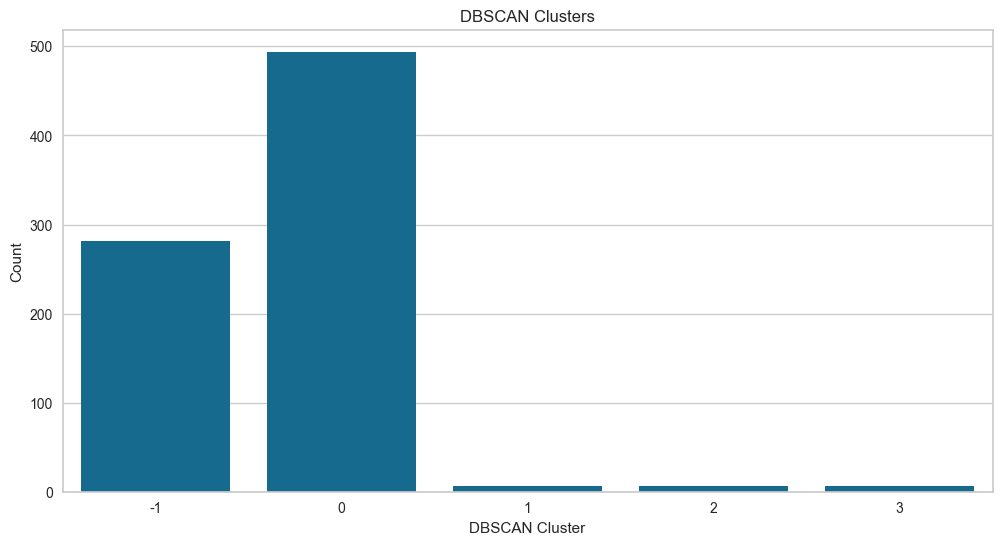

In [38]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_features)

df_customers['DBSCAN_Cluster'] = dbscan.labels_
df_customers['DBSCAN_Cluster'].value_counts()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_customers, x='DBSCAN_Cluster')
plt.title('DBSCAN Clusters')
plt.xlabel('DBSCAN Cluster')
plt.ylabel('Count')
plt.show()
# Histogram# Histogram of DBSCAN clusters# # # # # # #

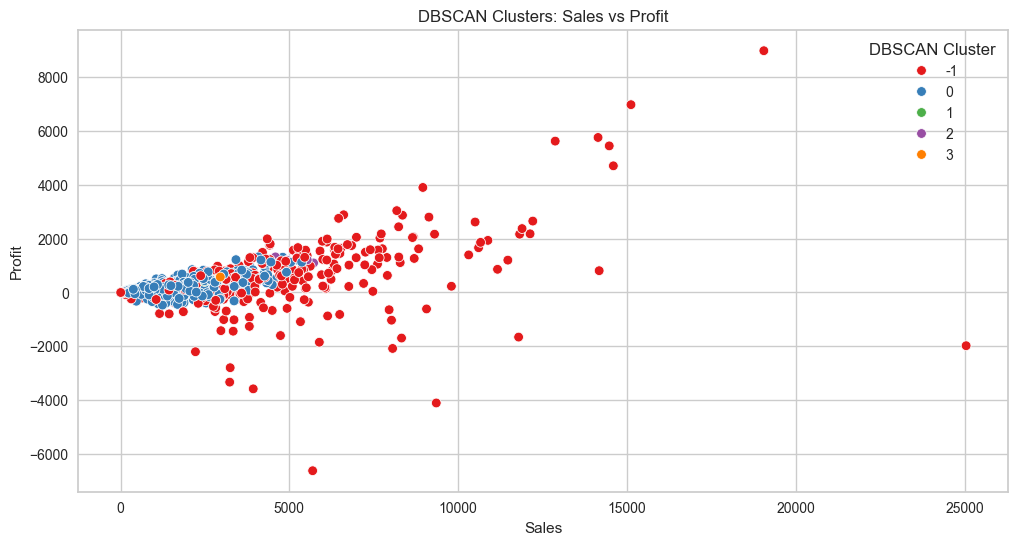

In [39]:
# scatterplot DBSCAN
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_customers, x='Sales', y='Profit', hue='DBSCAN_Cluster', palette='Set1')
plt.title('DBSCAN Clusters: Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='DBSCAN Cluster')
plt.show()


In [40]:
cluster_summary = df_customers.groupby('DBSCAN_Cluster')[['Sales', 'Quantity', 'Discount', 'Order ID','Profit']].mean()
print(cluster_summary)

                      Sales   Quantity  Discount   Order ID       Profit
DBSCAN_Cluster                                                          
-1              4910.772270  64.291815  0.182105  16.451957   583.262765
 0              1717.962041  37.222672  0.145870  10.107287   219.681738
 1              2566.791800  72.000000  0.163882  20.000000   306.850883
 2              5155.810333  79.333333  0.071331  21.166667  1176.822933
 3              2853.587500  70.500000  0.049803  19.166667   626.090300


##### KMeans

In [41]:
kmeans = KMeans(n_clusters=4, random_state=7)
kmeans.fit(scaled_features)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,7
,copy_x,True
,algorithm,'lloyd'


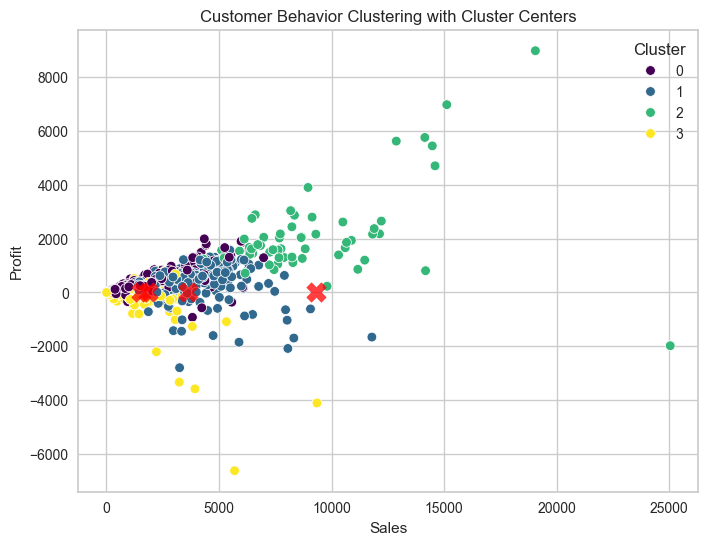

In [42]:
df_customers['Cluster'] = kmeans.labels_

# Visualize the clusters using Sales and Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', data=df_customers, palette='viridis', legend='full')

# Plot the cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Inverse transform to original scale
plt.scatter(centers[:, 0], centers[:, 3], c='red', s=200, alpha=0.75, marker='X')  # Sales vs Profit

plt.title('Customer Behavior Clustering with Cluster Centers')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [43]:
score = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score for {kmeans.n_clusters} clusters: {score}')

Silhouette Score for 4 clusters: 0.27208204224107163


In [44]:
cluster_summary = df_customers.groupby('Cluster')[['Sales', 'Quantity', 'Discount', 'Order ID','Profit']].mean()
print(cluster_summary)

               Sales   Quantity  Discount   Order ID       Profit
Cluster                                                          
0        1868.231331  33.617162  0.095161   9.132013   335.965944
1        3618.960472  69.606426  0.165327  18.164659   299.136329
2        9294.072632  80.084746  0.126359  20.406780  2158.372634
3        1519.295924  30.450549  0.260911   8.153846  -101.914352


#### Discount Sensitivity Clustering

In [45]:
df_orders = df.groupby("Order ID")[["Discount","Sales","Quantity","Profit"]]\
.agg({'Discount':'mean','Sales':'sum','Quantity':'sum','Profit':'sum'})\
.reset_index()

df_orders

,Order ID,Discount,Sales,Quantity,Profit
0,CA-2014-100006,0.000000,377.970,3,109.6113
1,CA-2014-100090,0.200000,699.192,9,-19.0890
2,CA-2014-100293,0.200000,91.056,6,31.8696
3,CA-2014-100328,0.200000,3.928,1,1.3257
4,CA-2014-100363,0.200000,21.376,5,7.7192
...,...,...,...,...,...
5002,US-2017-168802,0.200000,18.368,4,5.9696
5003,US-2017-169320,0.000000,171.430,7,16.6721
5004,US-2017-169488,0.000000,56.860,7,26.5552
5005,US-2017-169502,0.000000,113.410,8,32.4527


In [46]:
features = df_orders[["Discount","Sales","Profit"]]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-0.82215933, -0.08364008,  0.15281071],
       [ 0.22567837,  0.25303701, -0.22054754],
       [ 0.22567837, -0.3843585 , -0.07271716],
       ...,
       [-0.82215933, -0.42019979, -0.08813418],
       [-0.82215933, -0.36092897, -0.0710256 ],
       [ 0.66227741,  0.92974727, -0.34587174]])

##### DBSCAN

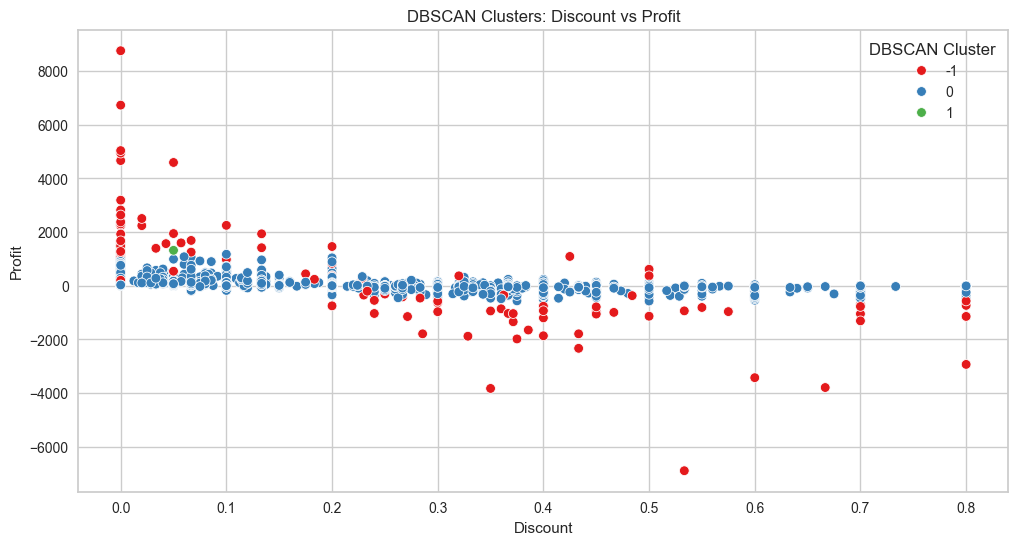

In [47]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_features)

df_orders['DBSCAN_Cluster'] = dbscan.labels_
df_orders['DBSCAN_Cluster'].value_counts()

# scatterplot DBSCAN
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_orders, x='Discount', y='Profit', hue='DBSCAN_Cluster', palette='Set1')
plt.title('DBSCAN Clusters: Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.legend(title='DBSCAN Cluster')
plt.show()


In [48]:
cluster_summary_dbscan = df_orders.groupby('DBSCAN_Cluster')[['Sales', 'Discount','Profit']].mean()
print(cluster_summary_dbscan)

                      Sales  Discount       Profit
DBSCAN_Cluster                                    
-1              4203.187456  0.258012   303.829604
 0               364.729080  0.154675    49.756909
 1              4484.273200  0.010000  1344.341720


##### KMeans

In [49]:
kmeans = KMeans(n_clusters= 5,random_state=7)
kmeans.fit(scaled_features)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,7
,copy_x,True
,algorithm,'lloyd'


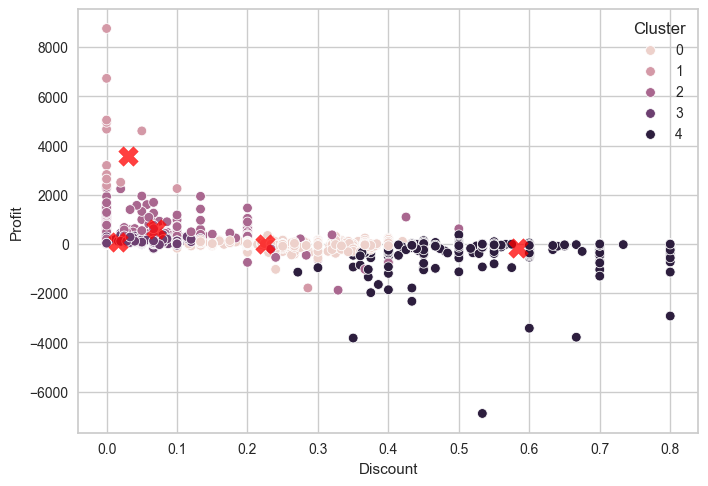

In [50]:
df_orders["Cluster"] = kmeans.labels_

sns.scatterplot(data=df_orders,x="Discount",y="Profit",hue="Cluster")

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:,0],centers[:,2] , c='red', s=200, alpha=0.75, marker='X')

In [51]:
score = silhouette_score(scaled_features, kmeans.labels_)
print(f'Silhouette Score for {kmeans.n_clusters} clusters: {score}')


Silhouette Score for 5 clusters: 0.508380569115559


In [52]:

cluster_summary = df_orders.groupby('Cluster')[['Sales', 'Discount','Profit']].mean()
print(cluster_summary)

                Sales  Discount       Profit
Cluster                                     
0          311.612929  0.224735     5.606689
1        10316.080800  0.030381  3573.528780
2         2767.344268  0.070366   591.133803
3          292.015370  0.015843    70.919215
4          329.014532  0.583830  -172.650914


### 2. Association Rule Mining

Karena jumlah produk yang sangat banyak, maka kita akan menggunakan Sub-Category sebagai itemset. Kita akan menggunakan algoritma Apriori dan FP-Growth untuk mencari asosiasi antar Sub-Category.

In [56]:
# Make new dataframe with only Order ID and Product Name
df_orders_subcategory = df[['Order ID', 'Sub-Category']].copy()
df_orders_subcategory

,Order ID,Sub-Category
0,CA-2016-152156,Bookcases
1,CA-2016-152156,Chairs
2,CA-2016-138688,Labels
3,US-2015-108966,Tables
4,US-2015-108966,Storage
...,...,...
9989,CA-2014-110422,Furnishings
9990,CA-2017-121258,Furnishings
9991,CA-2017-121258,Phones
9992,CA-2017-121258,Paper


In [57]:
# Show product frequency based on all data
df_orders_subcategory['Sub-Category'].value_counts()

Sub-Category
Binders        1521
Paper          1366
Furnishings     955
Phones          889
Storage         844
Art             796
Accessories     771
Chairs          615
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

In [58]:
(df_orders_subcategory.groupby('Order ID')['Sub-Category']
    .apply(lambda x: list(set(x)))  # remove duplicates
    .tolist())

[['Phones'],
 ['Binders', 'Tables'],
 ['Paper'],
 ['Binders'],
 ['Paper', 'Fasteners'],
 ['Paper'],
 ['Chairs', 'Art', 'Accessories', 'Envelopes'],
 ['Accessories', 'Furnishings'],
 ['Art', 'Labels', 'Paper'],
 ['Labels'],
 ['Phones'],
 ['Phones'],
 ['Art', 'Storage', 'Phones'],
 ['Art', 'Storage', 'Tables'],
 ['Paper'],
 ['Appliances'],
 ['Storage'],
 ['Paper'],
 ['Binders'],
 ['Storage'],
 ['Art'],
 ['Furnishings'],
 ['Machines'],
 ['Binders', 'Art', 'Paper', 'Furnishings'],
 ['Chairs', 'Phones'],
 ['Binders'],
 ['Paper'],
 ['Binders', 'Storage', 'Bookcases', 'Supplies'],
 ['Paper'],
 ['Labels'],
 ['Art', 'Paper', 'Storage', 'Phones'],
 ['Chairs'],
 ['Labels', 'Phones'],
 ['Paper'],
 ['Paper', 'Furnishings'],
 ['Art', 'Labels', 'Fasteners', 'Phones'],
 ['Accessories', 'Paper', 'Phones', 'Furnishings'],
 ['Art', 'Paper', 'Phones', 'Supplies'],
 ['Accessories'],
 ['Furnishings'],
 ['Binders', 'Labels'],
 ['Storage'],
 ['Furnishings'],
 ['Chairs', 'Paper', 'Phones', 'Supplies'],
 ['Bind

In [59]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

transactions = (df_orders_subcategory.groupby('Order ID')['Sub-Category']
    .apply(lambda x: list(set(x)))  # remove duplicates
    .tolist())

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori
frequent_itemsets_ap = apriori(df_encoded, min_support=0.001, use_colnames=True)
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.7)

# FP-Growth
frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.001, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.7)

# Cetak hasil aturan
print("Association Rules (Apriori):")
print(rules_ap[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\nAssociation Rules (FP-Growth):")
print(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Association Rules (Apriori):
                               antecedents    consequents   support  \
0                      (Fasteners, Tables)      (Binders)  0.001398   
1                        (Chairs, Copiers)        (Paper)  0.001598   
2        (Accessories, Appliances, Chairs)      (Binders)  0.001198   
3   (Accessories, Appliances, Furnishings)      (Binders)  0.001797   
4       (Accessories, Furnishings, Tables)        (Paper)  0.001398   
5        (Chairs, Appliances, Furnishings)      (Binders)  0.001598   
6       (Appliances, Storage, Furnishings)      (Binders)  0.002397   
7        (Appliances, Tables, Furnishings)       (Phones)  0.001398   
8             (Appliances, Phones, Tables)  (Furnishings)  0.001398   
9                 (Art, Fasteners, Phones)      (Binders)  0.001198   
10            (Storage, Fasteners, Phones)      (Binders)  0.001398   

    confidence      lift  
0     0.700000  2.665323  
1     0.800000  3.368881  
2     0.750000  2.855703  
3     0.75

In [60]:
# Sort Apriori rules by confidence (highest to lowest)
rules_ap_sorted = rules_ap.sort_values(by='confidence', ascending=False)

# Sort FP-Growth rules by confidence (highest to lowest)
rules_fp_sorted = rules_fp.sort_values(by='confidence', ascending=False)

# Convert frozensets to strings
rules_ap_sorted['antecedents'] = rules_ap_sorted['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_ap_sorted['consequents'] = rules_ap_sorted['consequents'].apply(lambda x: ', '.join(list(x)))

rules_fp_sorted['antecedents'] = rules_fp_sorted['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_fp_sorted['consequents'] = rules_fp_sorted['consequents'].apply(lambda x: ', '.join(list(x)))


In [61]:
# Show the rules as a table
print("Apriori:")
display(rules_ap_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
print("\nFP-Growth:")
display(rules_fp_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Apriori:


,antecedents,consequents,support,confidence,lift
1,"Chairs, Copiers",Paper,0.001598,0.800000,3.368881
4,"Accessories, Furnishings, Tables",Paper,0.001398,0.777778,3.275301
2,"Accessories, Appliances, Chairs",Binders,0.001198,0.750000,2.855703
9,"Art, Fasteners, Phones",Binders,0.001198,0.750000,2.855703
3,"Accessories, Appliances, Furnishings",Binders,0.001797,0.750000,2.855703
5,"Chairs, Appliances, Furnishings",Binders,0.001598,0.727273,2.769167
6,"Appliances, Storage, Furnishings",Binders,0.002397,0.705882,2.687721
0,"Fasteners, Tables",Binders,0.001398,0.700000,2.665323
7,"Appliances, Tables, Furnishings",Phones,0.001398,0.700000,4.305774
8,"Appliances, Phones, Tables",Furnishings,0.001398,0.700000,4.001027



FP-Growth:


,antecedents,consequents,support,confidence,lift
10,"Chairs, Copiers",Paper,0.001598,0.800000,3.368881
0,"Accessories, Tables, Furnishings",Paper,0.001398,0.777778,3.275301
4,"Art, Fasteners, Phones",Binders,0.001198,0.750000,2.855703
9,"Accessories, Appliances, Chairs",Binders,0.001198,0.750000,2.855703
6,"Accessories, Appliances, Furnishings",Binders,0.001797,0.750000,2.855703
8,"Chairs, Appliances, Furnishings",Binders,0.001598,0.727273,2.769167
7,"Appliances, Storage, Furnishings",Binders,0.002397,0.705882,2.687721
2,"Appliances, Phones, Tables",Furnishings,0.001398,0.700000,4.001027
1,"Appliances, Tables, Furnishings",Phones,0.001398,0.700000,4.305774
5,"Fasteners, Tables",Binders,0.001398,0.700000,2.665323


- Pelanggan yang membeli Chairs dan Copiers cenderung membeli juga Paper dengan nilai confidence 80%.
- Pelanggan yang membeli Furnishings, Tables, dan Accessories cenderung membeli juga Paper dengan nilai confidence 77%.
- Pelanggan yang membeli Fasteners, Art, Phones cenderung membeli juga Binders dengan nilai confidence 75%.